In [1]:
import pandas as pd
import numpy as np

In [599]:
#Read in the data
#Finished with everything
data = pd.read_csv("S:/Science_and_Research/ERA5_Reanalysis_1990-2020/VIH_850.csv")

In [784]:
#Slice data so it is within the date range we want
newdata = data[(pd.to_datetime(data["Date"]).dt.month == 1) & (pd.to_datetime(data["Date"]).dt.day  > 15)].reset_index(drop=True)

In [785]:
#Seperate data into two lists based on whether they are clear or cloudy for the day, split by 850/925 mb temp and max temp
import statistics
MaxT0 = []
MaxT1 = []
clear850 = []
cloudy850 = []
for i in range(len(newdata)):
    if newdata["cc"][i] == 0:
        MaxT0.append(newdata[" MaxTemperature"][i])
        clear850.append(newdata["temp850"][i])
    else:
        MaxT1.append(newdata[" MaxTemperature"][i])
        cloudy850.append(newdata["temp850"][i])

In [786]:
#Create 6 bins based on which values exceed the 10th, 25th, 50th, 75th, and 90th percentiles
bins = []
p10 = np.percentile(newdata["temp850"],10)
quartiles = statistics.quantiles(newdata["temp850"], n=4)
p90 = np.percentile(newdata["temp850"], 90)
bin1=[]
bin2=[]
bin3=[]
bin4=[]
bin5=[]
bin6=[]
bin7=[]
bin8=[]
bin9=[]
bin10=[]
bin11=[]
bin12=[]
bins.append(p10)
bins.append(quartiles)
bins.append(p90)

In [787]:
#Put data into 12 bins based on 850 mb temp. The bins contain the max temp associated with the given 850 mb temp.
for i in range(len(MaxT0)):
    if MaxT0[i] == " M":
        continue
    if clear850[i] < bins[0]:
        bin1.append(int(MaxT0[i]))
    elif clear850[i] >= bins[0] and clear850[i] < bins[1][0]:
        bin3.append(int(MaxT0[i]))
    elif clear850[i] >= bins[1][0] and clear850[i] < bins[1][1]:
        bin5.append(int(MaxT0[i]))
    elif clear850[i] >= bins[1][1] and clear850[i] < bins[1][2]:
        bin7.append(int(MaxT0[i]))
    elif clear850[i] >= bins[1][2] and clear850[i] < bins[2]:
        bin9.append(int(MaxT0[i]))
    else:
        bin11.append(int(MaxT0[i]))
for i in range(len(MaxT1)):
    if MaxT1[i] == " M":
        continue
    elif cloudy850[i] < bins[0]:
        bin2.append(int(MaxT1[i]))
    elif cloudy850[i] >= bins[0] and cloudy850[i] < bins[1][0]:
        bin4.append(int(MaxT1[i]))
    elif cloudy850[i] >= bins[1][0] and cloudy850[i] < bins[1][1]:
        bin6.append(int(MaxT1[i]))
    elif cloudy850[i] >= bins[1][1] and cloudy850[i] < bins[1][2]:
        bin8.append(int(MaxT1[i]))
    elif cloudy850[i] >= bins[1][2] and cloudy850[i] < bins[2]:
        bin10.append(int(MaxT1[i]))
    else:
        bin12.append(int(MaxT1[i]))

In [788]:
for i in range(len(cloudy850)):
   if cloudy850[i] > 299.49:
        print(cloudy850[i])

In [789]:
#Put all of the bins into a list for plotting purposes
bindata = [bin1,bin2,bin3,bin4,bin5,bin6,bin7,bin8,bin9,bin10,bin11,bin12]

In [790]:
SGF1max = [44,49,59,68,76,85,90,90,86,76,63,51]
SGF1min = [44,46,54,65,72,81,88,90,82,70,57,47]
SGF2max = [46,53,64,72,81,88,90,90,81,70,57,47]
SGF2min = [44,50,59,69,76,86,90,87,76,64,52,44]
JLN1max = [45,50,60,69,77,86,90,91,87,76,65,52]
JLN1min = [44,47,54,65,73,82,89,91,82,71,59,48]
JLN2max = [46,54,65,73,82,89,91,90,82,71,58,47]
JLN2min = [44,50,60,69,77,86,90,87,77,65,53,45]
VIH1max = [41,46,56,67,75,83,88,89,84,74,61,49]
VIH1min = [40,42,51,62,71,79,87,88,79,68,54,44]
VIH2max = [42,50,62,71,79,86,89,87,79,68,55,44]
VIH2min = [40,46,56,67,75,84,88,84,74,62,49,41]
UNO1max = [44,50,59,69,76,85,89,90,86,75,63,51]
UNO1min = [44,46,54,65,73,81,87,89,81,70,57,47]
UNO2max = [46,53,65,73,81,87,90,89,81,70,57,47]
UNO2min = [44,50,59,69,76,85,89,86,76,63,52,44]

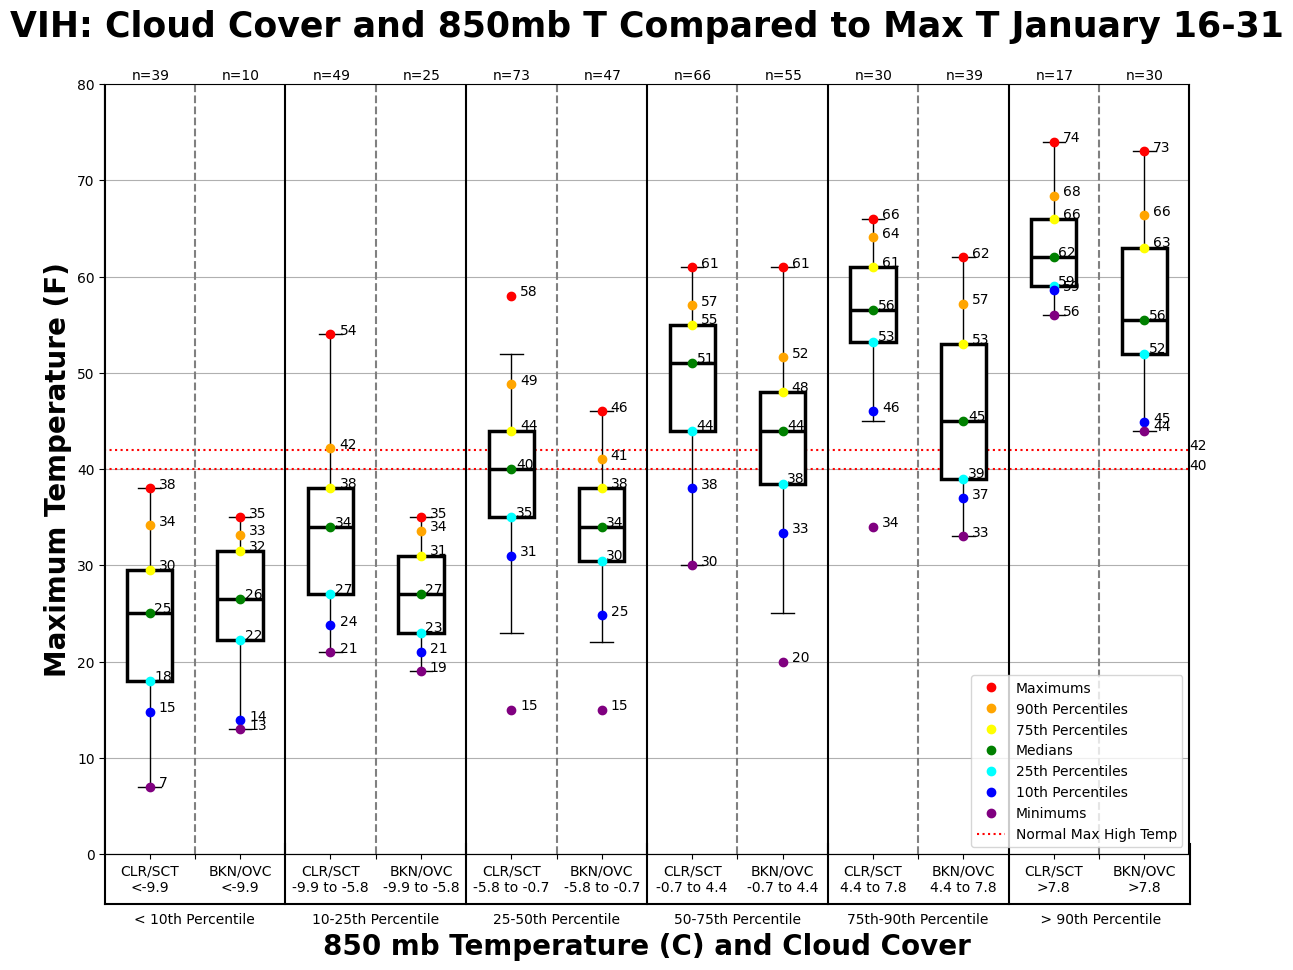

In [791]:
#Create the boxplot
#Note: Need to redo the plots for SGF/JLN/and some of UNO due to labels
import matplotlib.pyplot as plt
import matplotlib.lines as lines
x = [1,2,3,4,5,6,7,8,9,10,11,12]
fig, ax = plt.subplots(figsize = (14,10))
upper_quartiles = [np.percentile(i, 75) for i in bindata]
lower_quartiles = [np.percentile(i, 25) for i in bindata]
percentile90 = [np.percentile(i, 90) for i in bindata]
percentile10 = [np.percentile(i, 10) for i in bindata]
medians = [np.median(i) for i in bindata]
maximums = []
minimums = []
for i in range(len(bindata)):
    maximums.append(max(bindata[i]))
for i in range(len(bindata)):
    minimums.append(min(bindata[i]))
plt.grid(axis="y")
plt.plot(x, maximums, 'o', color = "red", zorder=8)
plt.plot(x, percentile90, 'o', color = "orange", zorder=3)
plt.plot(x, upper_quartiles, 'o', color = "yellow", zorder=4)
plt.plot(x, medians, 'o', color = "green", zorder=8)
plt.plot(x, lower_quartiles, 'o', color = "cyan", zorder=5)
plt.plot(x, percentile10, 'o', color = "blue", zorder=6)
plt.plot(x, minimums, 'o', color = "purple",zorder=7)
plt.axhline(y = VIH2max[0], color = "red", linestyle = "dotted")
plt.axhline(y= VIH2min[0], color = "red", linestyle = "dotted")
plt.title("VIH: Cloud Cover and 850mb T Compared to Max T January 16-31\n", fontweight = "bold", fontsize = "25")
plt.ylabel("Maximum Temperature (F)", fontweight = "bold", fontsize = "20")
plt.xlim = (0,13)
plt.ylim(round(min(minimums)-5,-1),round(max(maximums)+5,-1))
plt.legend(["Maximums", "90th Percentiles", "75th Percentiles", "Medians","25th Percentiles", "10th Percentiles", "Minimums", "Normal Max High Temp"], loc = "lower right")
plt.boxplot(bindata, medianprops = dict(linestyle='-', linewidth=2.5, color = "black"), boxprops =  dict(linestyle='-', linewidth=2.5, facecolor = "white"),notch = False, showfliers = False, patch_artist = True)
for xs,ys in zip(x, maximums):
    plt.text(xs+.1,ys, str(maximums[xs-1]), color = "black")
for xs,ys in zip(x, percentile90):
    plt.text(xs+.1,ys, str(round(percentile90[xs-1])), color = "black")
for xs,ys in zip(x, upper_quartiles):
    plt.text(xs+.1,ys+.1, str(round(upper_quartiles[xs-1])), color = "black")
for xs,ys in zip(x, medians):
    plt.text(xs+.05,ys+.1, str(round(medians[xs-1])), color = "black")
for xs,ys in zip(x, lower_quartiles):
    plt.text(xs+.05,ys+.1, str(round(lower_quartiles[xs-1])), color = "black")
for xs,ys in zip(x, percentile10):
    plt.text(xs+.1,ys, str(round(percentile10[xs-1])), color = "black")
for xs,ys in zip(x, minimums):
    plt.text(xs+.1,ys, str(minimums[xs-1]), color = "black")
for i in range(len(bindata)):
    plt.text(i+.8, round(max(maximums)+5,-1)+.5,"n=" +str(len(bindata[i])))
plt.xticks(ticks = [1,2,3,4,5,6,7,8,9,10,11,12],labels =["CLR/SCT\n<"+str(round(bins[0]-273.15,1)),"BKN/OVC\n<"+str(round(bins[0]-273.15,1)), "CLR/SCT\n"+str(round(bins[0]-273.15,1))+" to "+str(round(bins[1][0]-273.15,1)),"BKN/OVC\n"+str(round(bins[0]-273.15,1))+" to "+str(round(bins[1][0]-273.15,1)),"CLR/SCT\n"+str(round(bins[1][0]-273.15,1))+" to "+str(round(bins[1][1]-273.15,1)),"BKN/OVC\n"+str(round(bins[1][0]-273.15,1))+" to "+str(round(bins[1][1]-273.15,1)), "CLR/SCT\n"+str(round(bins[1][1]-273.15,1))+" to "+str(round(bins[1][2]-273.15,1)), "BKN/OVC\n"+str(round(bins[1][1]-273.15,1))+" to "+str(round(bins[1][2]-273.15,1)), "CLR/SCT\n"+str(round(bins[1][2]-273.15,1))+" to "+str(round(bins[2]-273.15,1)), "BKN/OVC\n"+str(round(bins[1][2]-273.15,1))+" to "+str(round(bins[2]-273.15,1)), "CLR/SCT\n>"+str(round(bins[2]-273.15,1)), "BKN/OVC\n>"+str(round(bins[2]-273.15,1))])
sec = ax.secondary_xaxis(location=0)
sec.set_xticks(ticks = [1.5,3.5,5.5,7.5,9.5,11.5], labels = ["\n\n\n< 10th Percentile", "\n\n\n10-25th Percentile", "\n\n\n25-50th Percentile", "\n\n\n50-75th Percentile", "\n\n\n75th-90th Percentile", "\n\n\n > 90th Percentile"])
plt.vlines(x=[0.5,2.5,4.5,6.5,8.5,10.5,12.5], ymin = round(min(minimums)-5,-1), ymax = round(max(maximums)+5,-1), color = "black" )
plt.vlines(x = [1.5,3.5,5.5,7.5,9.5,11.5], ymin = round(min(minimums)-5,-1), ymax = round(max(maximums)+5,-1), color = "grey", linestyle = "--")
plt.xlabel("\n850 mb Temperature (C) and Cloud Cover", fontweight = "bold", fontsize = "20")
plt.text(12.5,VIH2max[0], str(VIH2max[0]))
plt.text(12.5,VIH2min[0], str(VIH2min[0]))
fig.add_artist(lines.Line2D([0.5885/4.68, 0.5885/4.68], [0.06, 0.878], color = "black"))
fig.add_artist(lines.Line2D([1.19/4.68, 1.19/4.68], [0.06, 0.12], color = "black"))
fig.add_artist(lines.Line2D([1.795/4.68, 1.795/4.68], [0.06, 0.12], color = "black"))
fig.add_artist(lines.Line2D([2.4/4.68, 2.4/4.68], [0.06, 0.12], color = "black"))
fig.add_artist(lines.Line2D([3.0025/4.68, 3.0025/4.68], [0.06, 0.12], color = "black"))
fig.add_artist(lines.Line2D([3.6075/4.68, 3.6075/4.68], [0.06, 0.108], color = "black"))
fig.add_artist(lines.Line2D([4.2125/4.68, 4.2125/4.68], [0.06, 0.12], color = "black"))
fig.add_artist(lines.Line2D([0.5885/4.68, 4.2125/4.68], [0.06, 0.06], color = "black"))
plt.savefig(fname = "S:/Science_and_Research/ERA5_Reanalysis_1990-2020/Finished_Graphs_VIH/VIH_January_850_16-31")

In [110]:
len(bin1)+len(bin2)+len(bin3)+len(bin4)+len(bin5)+len(bin6)+len(bin7)+len(bin8)+len(bin9)+len(bin10)+len(bin11)+len(bin12)

496

63

In [57]:
max(bindata[0])

TypeError: 'list' object is not callable

In [53]:
for i in range(len(bindata)):
    print(max(bindata[i]))

TypeError: 'list' object is not callable